In [1]:
import pandas as pd

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()
print(df.columns)



Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


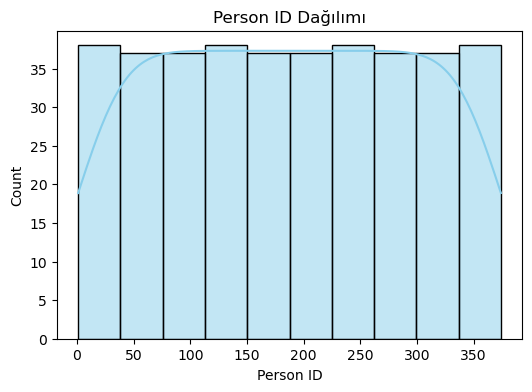

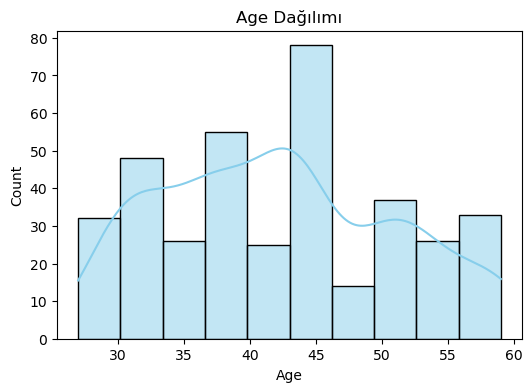

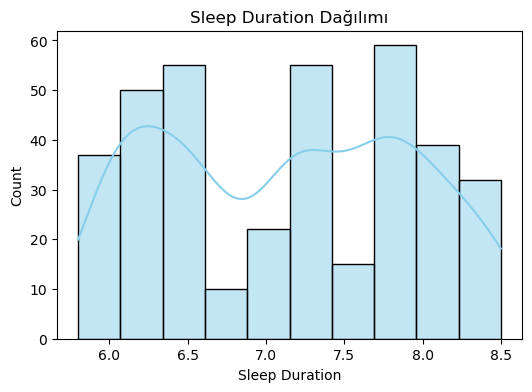

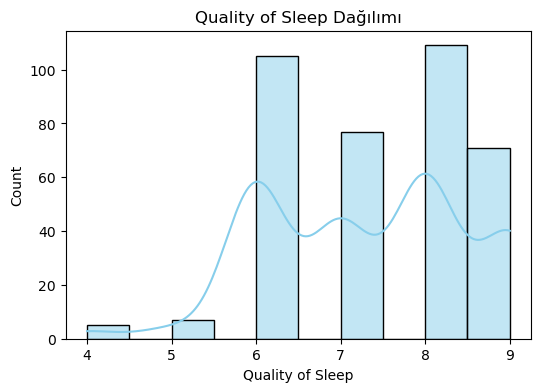

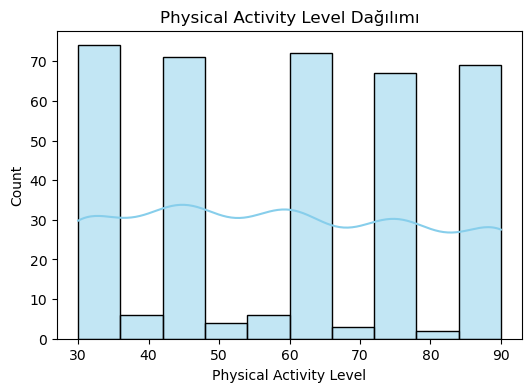

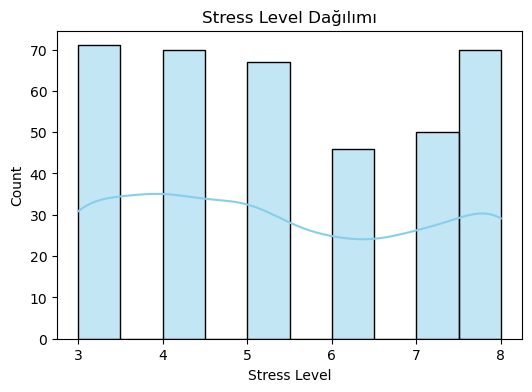

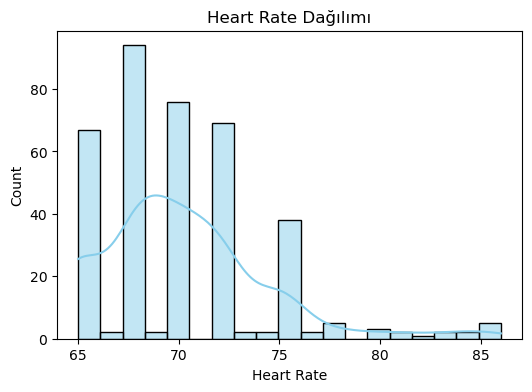

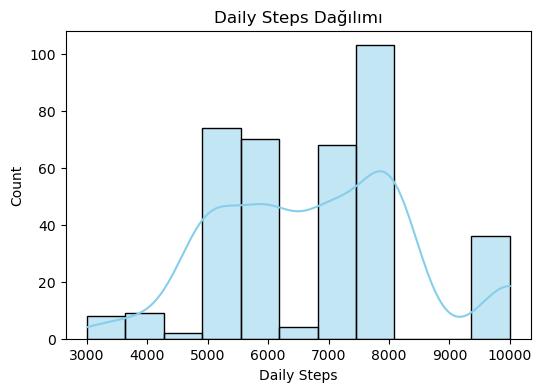

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"{col} Dağılımı")
    plt.show()


In [5]:
df.isnull().sum()


Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

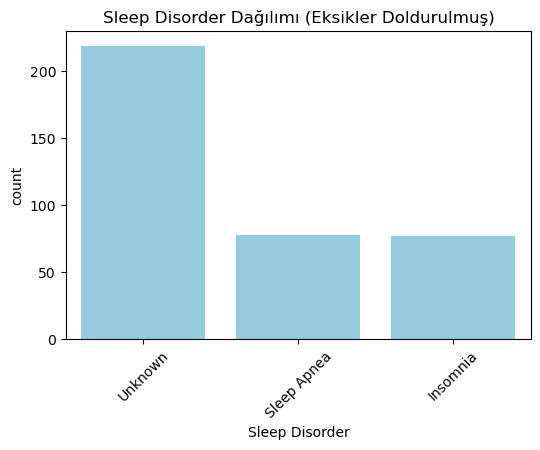

In [7]:
#******burada eksik veriler dolduruldu********
# "Sleep Disorder" eksiklerini "Unknown" ile doldur
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("Unknown")

# Sonrasında dağılımına bak
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Sleep Disorder", data=df, color="skyblue")
plt.title("Sleep Disorder Dağılımı (Eksikler Doldurulmuş)")
plt.xticks(rotation=45)
plt.show()


In [9]:
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [11]:
#*******kan basıncını kategorik hale getirdik********
# Normal kan basıncı değerleri
normal_bp_values = ['120/80', '126/83', '125/80', '117/76', '118/75']  # örnek olarak uzatılabilir

# Yeni sütun oluştur: 0 = normal, 1 = anormal
df["BP_Status"] = df["Blood Pressure"].apply(lambda x: 0 if x in normal_bp_values else 1)

# Orijinal sütunu kaldırabilirsin (isteğe bağlı)
#df.drop("Blood Pressure", axis=1, inplace=True)


In [13]:
#*****1.SORU:Uyku süresi ile stres seviyesi arasında nasıl bir ilişki vardır? Uyku süresi azaldıkça stres seviyelerinde artış gözlemlenmekte midir? 
# İnceleyeceğimiz iki sütun: Sleep Duration (süre: float) --Stress Level (seviye: int)


In [15]:
#veriyi normalleştirme: 0-1 aralığına getirildi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Sleep Duration', 'Stress Level']] = scaler.fit_transform(df[['Sleep Duration', 'Stress Level']])


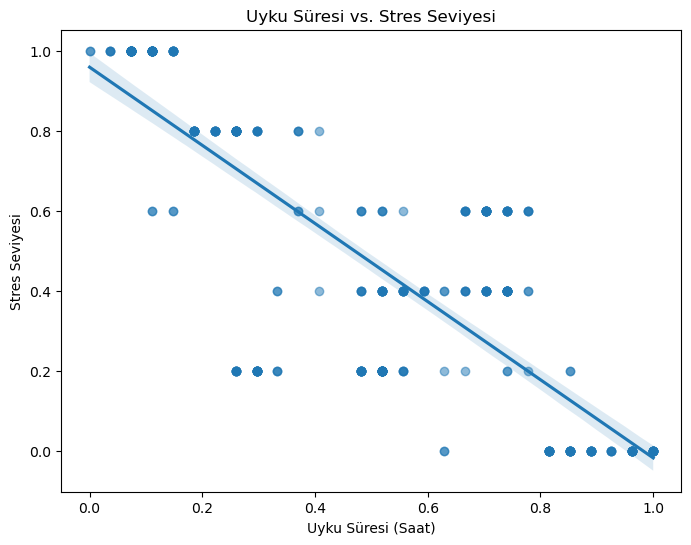

In [17]:
#aralarındaki ilişki için grafik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(x='Sleep Duration', y='Stress Level', data=df, scatter_kws={'alpha':0.5})

plt.title('Uyku Süresi vs. Stres Seviyesi')
plt.xlabel('Uyku Süresi (Saat)')
plt.ylabel('Stres Seviyesi')
plt.show()


In [19]:
# Uyku süresi ve stres seviyesi arasındaki korelasyon
correlation = df[['Sleep Duration', 'Stress Level']].corr()
print(correlation)



                Sleep Duration  Stress Level
Sleep Duration        1.000000     -0.811023
Stress Level         -0.811023      1.000000


In [21]:
# Uyku süresi ve stres seviyesi arasındaki ilişki için  3 ayrı model 
#SVR (Destek Vektör Regresyonu), R² Skoru açısından en yüksek değeri elde etti (0.84), bu da modelin uyku süresi ile stres seviyesi arasındaki ilişkiyi doğrusal regresyon ve ridge regresyondan daha iyi yakaladığını gösteriyor.
#Ayrıca MSE (Ortalama Kare Hata) da en düşük (0.02) oldu, bu da tahminlerin ne kadar doğru olduğunu gösteriyor.

#Doğrusal Regresyon ve Ridge Regresyon modelleri aynı performansı gösterdi ve her ikisi de R² Skoru olarak 0.71'de kaldı. Bu, doğrusal ilişkiyi modellemek için yeterli olsa da, SVR'nin daha iyi performans gösterdiğini gösteriyor.


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Özellikleri ve hedefi ayırma
X = df[['Sleep Duration']]  # Uyku süresi
y = df['Stress Level']  # Stres seviyesi

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Doğrusal regresyon modelini oluşturma


#lr_model = LinearRegression()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_lr = lr_model.predict(X_test)

# Modelin performansını değerlendirme
r2_score_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Doğrusal Regresyon - R² Skoru: {r2_score_lr:.2f}")
print(f"Doğrusal Regresyon - MSE: {mse_lr:.2f}")


Doğrusal Regresyon - R² Skoru: 0.71
Doğrusal Regresyon - MSE: 0.04


In [25]:
from sklearn.linear_model import Ridge

# Ridge regresyon modelini oluşturma
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_ridge = ridge_model.predict(X_test)

# Modelin performansını değerlendirme
r2_score_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regresyon - R² Skoru: {r2_score_ridge:.2f}")
print(f"Ridge Regresyon - MSE: {mse_ridge:.2f}")


Ridge Regresyon - R² Skoru: 0.71
Ridge Regresyon - MSE: 0.04


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Parametre aralığı
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Ridge modeli
ridge = Ridge()

# GridSearchCV
ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_search.fit(X_train, y_train)

# En iyi model ve tahmin
best_ridge = ridge_search.best_estimator_
y_pred_best_ridge = best_ridge.predict(X_test)

# Performans değerlendirme
r2_best = r2_score(y_test, y_pred_best_ridge)
mse_best = mean_squared_error(y_test, y_pred_best_ridge)

print("En iyi Ridge alpha değeri:", ridge_search.best_params_['alpha'])
print(f"Ridge (tuned) - R² Skoru: {r2_best:.2f}")
print(f"Ridge (tuned) - MSE: {mse_best:.2f}")


En iyi Ridge alpha değeri: 0.1
Ridge (tuned) - R² Skoru: 0.71
Ridge (tuned) - MSE: 0.04


In [29]:
from sklearn.svm import SVR

# SVR modelini oluşturma
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_svr = svr_model.predict(X_test)

# Modelin performansını değerlendirme
r2_score_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f"SVR - R² Skoru: {r2_score_svr:.2f}")
print(f"SVR - MSE: {mse_svr:.2f}")


SVR - R² Skoru: 0.84
SVR - MSE: 0.02


In [31]:
from sklearn.model_selection import GridSearchCV

# Parametre aralıkları
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 0.01, 0.1, 1]
}

# SVR modeli
svr = SVR(kernel='rbf')

# GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi model ile tahmin
best_svr = grid_search.best_estimator_
y_pred_best_svr = best_svr.predict(X_test)

# Performans
r2_best = r2_score(y_test, y_pred_best_svr)
mse_best = mean_squared_error(y_test, y_pred_best_svr)

print("En iyi SVR parametreleri:", grid_search.best_params_)
print(f"SVR (tuned) - R² Skoru: {r2_best:.2f}")
print(f"SVR (tuned) - MSE: {mse_best:.2f}")


En iyi SVR parametreleri: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale'}
SVR (tuned) - R² Skoru: 0.84
SVR (tuned) - MSE: 0.02


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
import numpy as np

# SVR için pipeline (ölçeklendirme önemli!)
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# MSE (negatif değer olduğu için işaret değiştiriyoruz)
mse_linear = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
mse_ridge = -cross_val_score(Ridge(alpha=1.0), X, y, cv=5, scoring='neg_mean_squared_error')
mse_svr = -cross_val_score(svr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

print("Linear MSE scores:", mse_linear)
print("Ridge MSE scores:", mse_ridge)
print("SVR MSE scores:", mse_svr)

# ANOVA testi
f_stat, p_val = f_oneway(mse_linear, mse_ridge, mse_svr)

print(f"\nANOVA F-istatistiği: {f_stat:.4f}")
print(f"ANOVA p-değeri: {p_val:.4f}")


Linear MSE scores: [0.08459293 0.05016848 0.03222929 0.07551547 0.02113697]
Ridge MSE scores: [0.08435607 0.05044088 0.03111856 0.0743923  0.02661173]
SVR MSE scores: [0.04431222 0.05619112 0.03478928 0.081612   0.03879945]

ANOVA F-istatistiği: 0.0114
ANOVA p-değeri: 0.9887


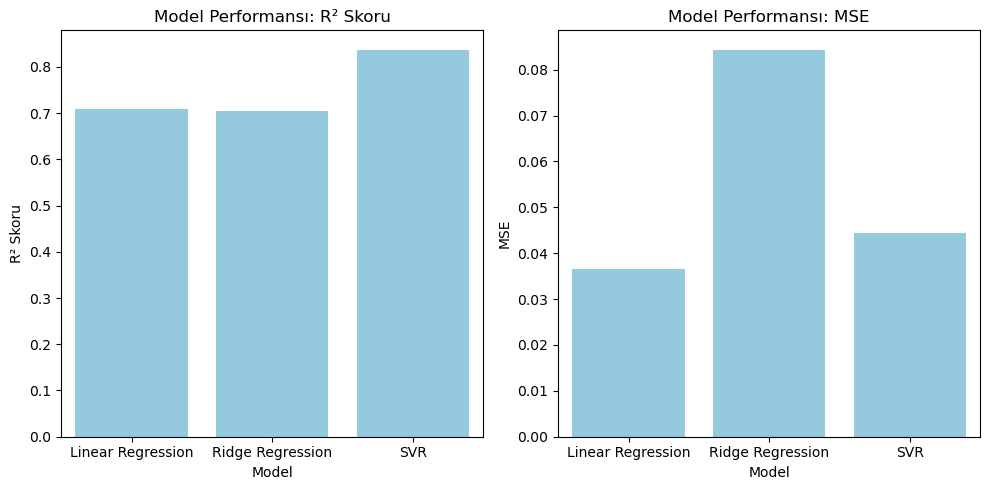

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Model isimleri ve performans verileri
models = ['Linear Regression', 'Ridge Regression', 'SVR']
r2_scores = [r2_score_lr, r2_score_ridge, r2_score_svr]
mse_scores = [mse_lr, mse_ridge, mse_svr]

# DataFrame oluştur
model_comparison_df = pd.DataFrame({
    'Model': models,
    'R² Score': r2_scores,
    'MSE': mse_scores
})

# (Opsiyonel) Eğer MSE skorları list/array içeriyorsa düzleştir
model_comparison_df['MSE'] = model_comparison_df['MSE'].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)

# Grafik: R² Skoru
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R² Score', data=model_comparison_df, color='skyblue')
plt.title('Model Performansı: R² Skoru')
plt.ylabel('R² Skoru')

# Grafik: MSE
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MSE', data=model_comparison_df, color='skyblue')
plt.title('Model Performansı: MSE')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


In [37]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Veriyi ölçekle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final SVR modeli (önceden tuning yapılmış parametrelerle)
final_svr = SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale')  # Buradaki değerleri tuning sonucuna göre güncelle
final_svr.fit(X_train_scaled, y_train)

# Eğitim ve test tahminleri
y_train_pred = final_svr.predict(X_train_scaled)
y_test_pred = final_svr.predict(X_test_scaled)

# Başarı ölçütleri
print("📊 Final Model: SVR")
print(f"🔹 Eğitim R² Skoru: {r2_score(y_train, y_train_pred):.2f}")
print(f"🔹 Eğitim MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"🔹 Test R² Skoru: {r2_score(y_test, y_test_pred):.2f}")
print(f"🔹 Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")


📊 Final Model: SVR
🔹 Eğitim R² Skoru: 0.78
🔹 Eğitim MSE: 0.0271
🔹 Test R² Skoru: 0.85
🔹 Test MSE: 0.0187


In [39]:
#2.SORU:	Uyku kalitesi ile bireylerin sağlık durumu arasındaki bağlantılar nelerdir?
#Uyku kalitesinin düşük olması, bireylerin fiziksel ve psikolojik sağlıklarını nasıl etkilemektedir?
#burada fiziksel ve psikolojik sağlık için iki ayrı model oluşturulur
#Sonuçları karşılaştırarak "Uyku kalitesini tahmin etmede fiziksel sağlık mı daha etkili, yoksa psikolojik sağlık mı?"
#sorusuna cevap aranır.

In [41]:
#2.1FİZİKSEL SAĞLIK VE UYKU KALİTESİ İLİŞKİSİ

In [43]:
print(df.columns)


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'BP_Status'],
      dtype='object')


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# BMI kategorisini sayısala çevir
df["BMI_Code"] = LabelEncoder().fit_transform(df["BMI Category"])

# Gerekli sütunları al
X_phys = df[["Heart Rate", "BMI_Code", "Daily Steps", "Physical Activity Level"]]
y = df["Quality of Sleep"]

# Eğitim ve test verisi böl
X_train, X_test, y_train, y_test = train_test_split(X_phys, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# 1. SVR için Pipeline ve GridSearch ayarı
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# 2. Parametre aralığı
param_grid = {
    'svr__kernel': ['rbf', 'linear'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.2],
    'svr__gamma': ['scale', 'auto']
}

# 3. GridSearchCV
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. En iyi SVR modelini al
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test)

# 5. R² ve MSE hesapla
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# 6. Diğer modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}

# 7. Sonuçları tutmak için
results = {}

# 8. Linear ve Ridge modellerini eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {"R² Score": r2, "MSE": mse}

# 9. SVR'yi manuel olarak ekle
results["SVR (Tuned)"] = {"R² Score": r2_svr, "MSE": mse_svr}

# 10. DataFrame ile sonuçları yazdır
results_df = pd.DataFrame(results).T
print(results_df)


                   R² Score       MSE
Linear Regression  0.729169  0.408582
Ridge Regression   0.729164  0.408589
SVR (Tuned)        0.976916  0.034825


In [49]:
from sklearn.model_selection import cross_val_score
from scipy.stats import f_oneway
import numpy as np

# 3 modelin tanımı
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "SVR": Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale'))
    ])
}

# MSE değerlerini çapraz doğrulama ile topla
mse_scores = {}
for name, model in models.items():
    scores = -cross_val_score(model, X_phys, y, cv=5, scoring='neg_mean_squared_error')  # negatif değerler pozitife çevriliyor
    mse_scores[name] = scores
    print(f"{name} MSE scores: {scores}")

# ANOVA testi
f_stat, p_value = f_oneway(mse_scores["Linear"], mse_scores["Ridge"], mse_scores["SVR"])
print(f"\nANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")



Linear MSE scores: [0.82729536 0.4448174  0.39067353 1.47895684 1.8782987 ]
Ridge MSE scores: [0.82657195 0.44479957 0.39054894 1.47797327 1.87768052]
SVR MSE scores: [1.25422479 0.23196966 0.62471874 0.11985367 0.44498937]

ANOVA F-statistic: 1.0417
ANOVA p-value: 0.3827


In [51]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Doğru isim
X_test_scaled = scaler.transform(X_test)        # Doğru isim

# Final SVR modeli
final_model = SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale')
final_model.fit(X_train_scaled, y_train)

# Tahminler
y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)

# Başarı ölçütleri
from sklearn.metrics import mean_squared_error, r2_score

print("📌 Final Model: SVR")
print(f"🔹 Eğitim R² Skoru: {r2_score(y_train, y_train_pred):.4f}")
print(f"🔹 Test R² Skoru: {r2_score(y_test, y_test_pred):.4f}")
print(f"🔸 Eğitim MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"🔸 Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")



📌 Final Model: SVR
🔹 Eğitim R² Skoru: 0.9675
🔹 Test R² Skoru: 0.9773
🔸 Eğitim MSE: 0.0453
🔸 Test MSE: 0.0343


In [53]:
#2.2 PSİKOLOJİK SAĞLIK VE UYKU KALİTESİ İLİŞKİSİ

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

In [57]:
# Gerekli sütunları seçme
df = df[['Stress Level', 'Quality of Sleep', 'Sleep Disorder']]

# Eksik verileri kaldır
df.dropna(inplace=True)

# Hedef değişkeni etiketle
le = LabelEncoder()
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])

# Özellik ve hedef ayır
X = df[['Stress Level', 'Quality of Sleep']]
y = df['Sleep Disorder']

# Veriyi eğitim/test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Stratified KFold (n_splits=3, çünkü az sayıda örnek var bazı sınıflarda)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# StandardScaler
scaler = StandardScaler()


In [59]:
# Modeller ve parametre grid'leri
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ['lbfgs', 'liblinear']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 5, 10]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance']
        }
    }
}

best_models = {}


In [61]:
# Tüm modelleri sırayla GridSearchCV ile eğit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

best_models = {}  # En iyi modelleri saklamak için

# Tüm modelleri sırayla GridSearchCV ile eğit
for name, mp in models.items():
    pipe = Pipeline([
        ('scaler', scaler),
        ('clf', mp['model'])
    ])
    
    # Parametre isimlerini clf__ ile uyumlu hale getir
    param_grid = {'clf__' + k: v for k, v in mp['params'].items()}
    
    grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print(f"📊 {name} - En iyi parametreler:")
    print(grid.best_params_)
    
    print("\n🔍 Eğitim Sonuçları:")
    y_pred = grid.predict(X_test)
    
    # zero_division=1 parametresi ile uyarıları bastır
    print(classification_report(y_test, y_pred, zero_division=1))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)
    
    best_models[name] = {
        "model": grid.best_estimator_,
        "score": grid.best_score_,
        "y_pred": y_pred
    }


📊 Logistic Regression - En iyi parametreler:
{'clf__C': 10, 'clf__solver': 'lbfgs'}

🔍 Eğitim Sonuçları:
              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       1.00      0.00      0.00        16
           2       0.64      0.95      0.76        44

    accuracy                           0.63        75
   macro avg       0.73      0.43      0.39        75
weighted avg       0.70      0.63      0.53        75

Confusion Matrix:
[[ 5  0 10]
 [ 2  0 14]
 [ 2  0 42]]
--------------------------------------------------
📊 Random Forest - En iyi parametreler:
{'clf__max_depth': 5, 'clf__n_estimators': 100}

🔍 Eğitim Sonuçları:
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       1.00      0.12      0.22        16
           2       0.77      0.98      0.86        44

    accuracy                           0.79        75
   macro avg       0.86     

In [63]:
from scipy.stats import friedmanchisquare
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

scorer = make_scorer(f1_score, average='macro')

# Modeller
log_model = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Cross-validation (5-fold)
f1_lr = cross_val_score(log_model, X, y, cv=5, scoring=scorer)
f1_rf = cross_val_score(rf_model, X, y, cv=5, scoring=scorer)
f1_knn = cross_val_score(knn_model, X, y, cv=5, scoring=scorer)

print("Logistic Regression F1:", f1_lr)
print("Random Forest F1:", f1_rf)
print("KNN F1:", f1_knn)


Logistic Regression F1: [0.49622071 0.55141455 0.4527027  0.2464986  0.4       ]
Random Forest F1: [0.57607539 0.66596445 0.61812298 0.56351133 0.46079627]
KNN F1: [0.5042735  0.40151515 0.48012627 0.92811249 0.34713596]


In [65]:
stat, p = friedmanchisquare(f1_lr, f1_rf, f1_knn)

print("Friedman Testi İstatistiği:", stat)
print("p-değeri:", p)
if p < 0.05:
    print("Model performansları arasında istatistiksel olarak anlamlı fark var.")
else:
    print("Model performansları arasında anlamlı fark yok.")

Friedman Testi İstatistiği: 5.200000000000003
p-değeri: 0.0742735782143338
Model performansları arasında anlamlı fark yok.


In [67]:
#anlamlı fark olmadığı için accuracy ve f1 skora bakarak random forest seçildi

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Final model pipeline
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42))
])

# Modeli eğitim verisine fit et
final_model.fit(X_train, y_train)

# Eğitim kümesi tahminleri
y_train_pred = final_model.predict(X_train)

# Test kümesi tahminleri
y_test_pred = final_model.predict(X_test)

# Eğitim başarı ölçütleri
print("📘 Eğitim Kümesi Başarı Ölçütleri:\n")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred))

# Test başarı ölçütleri
print("\n📙 Test Kümesi Başarı Ölçütleri:\n")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

📘 Eğitim Kümesi Başarı Ölçütleri:

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        62
           1       0.80      0.06      0.12        62
           2       0.72      0.98      0.83       175

    accuracy                           0.75       299
   macro avg       0.80      0.62      0.59       299
weighted avg       0.77      0.75      0.68       299

Confusion Matrix (Train):
[[ 50   1  11]
 [  4   4  54]
 [  4   0 171]]

📙 Test Kümesi Başarı Ölçütleri:

              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       1.00      0.12      0.22        16
           2       0.77      0.98      0.86        44

    accuracy                           0.79        75
   macro avg       0.86      0.68      0.65        75
weighted avg       0.83      0.79      0.73        75

Confusion Matrix (Test):
[[14  0  1]
 [ 2  2 12]
 [ 1  0 43]]


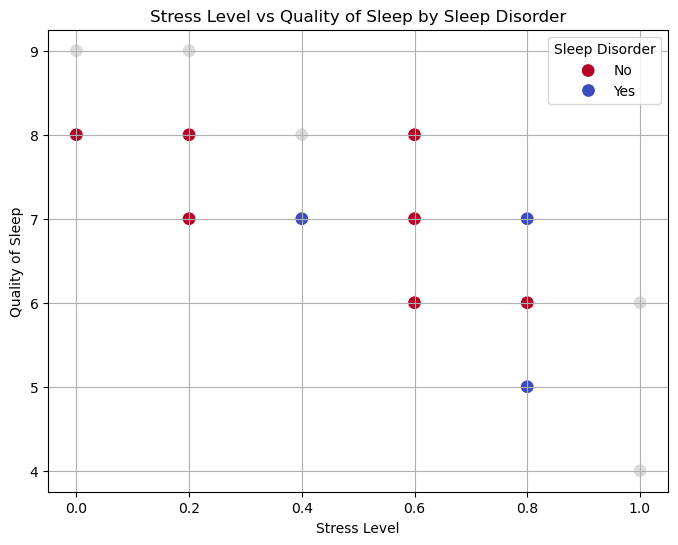

In [71]:
# Verinin görselleştirilmesi
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Stress Level'], y=df['Quality of Sleep'], hue=df['Sleep Disorder'], palette="coolwarm", s=100)
plt.title("Stress Level vs Quality of Sleep by Sleep Disorder")
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.legend(title="Sleep Disorder", labels=["No", "Yes"])
plt.grid(True)
plt.show()

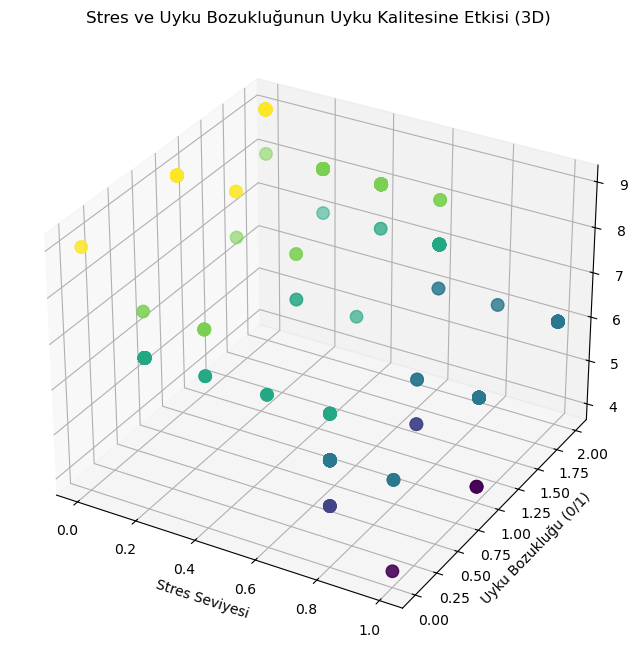

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Stress Level'], df['Sleep Disorder'], df['Quality of Sleep'],
           c=df['Quality of Sleep'], cmap='viridis', s=80)
ax.set_xlabel('Stres Seviyesi')
ax.set_ylabel('Uyku Bozukluğu (0/1)')
ax.set_zlabel('Uyku Kalitesi')
plt.title('Stres ve Uyku Bozukluğunun Uyku Kalitesine Etkisi (3D)')
plt.show()

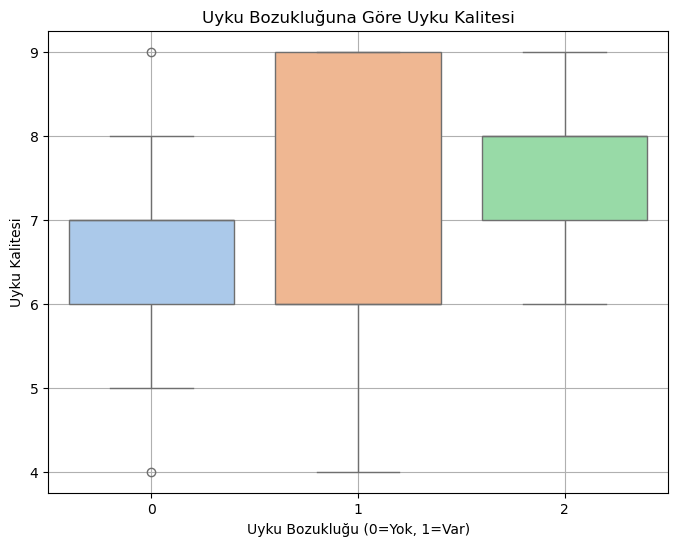

In [75]:

plt.figure(figsize=(8,6))
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', hue='Sleep Disorder', data=df, palette='pastel', legend=False)


plt.title("Uyku Bozukluğuna Göre Uyku Kalitesi")
plt.xlabel("Uyku Bozukluğu (0=Yok, 1=Var)")
plt.ylabel("Uyku Kalitesi")
plt.grid(True)
plt.show()


In [77]:
#3.SORU:3.	Mesleki stres ve yaşam tarzı faktörleri, bireylerin uyku düzenini nasıl etkilemektedir?
       #Çalışan bireylerde mesleki stres ve uyku düzensizliği arasındaki ilişki nedir? 
#temel amacı, uyku bozukluğu (hedef değişken) durumunu tahmin etmektir. 
#Yani, verilen stres seviyesi ve meslek bilgilerine dayalı olarak bir kişinin uyku bozukluğu yaşayıp yaşamadığını tahmin etmeyi hedefliyoruz.

In [79]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print(df.columns)


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [85]:
print(df_model.isnull().sum())


Stress Level      0
Occupation        0
Sleep Disorder    0
dtype: int64


In [87]:
# Model için sadece gerekli sütunları seç
df_model = df[['Stress Level', 'Occupation', 'Sleep Disorder']].dropna()

In [89]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnelerini oluştur
le_stress = LabelEncoder()
le_job = LabelEncoder()
le_target = LabelEncoder()

# 'Stress Level' ve 'Occupation' için LabelEncoder uygula
df_model['StressEncoded'] = le_stress.fit_transform(df_model['Stress Level'])
df_model['OccupationEncoded'] = le_job.fit_transform(df_model['Occupation'])

# 'Sleep Disorder' için LabelEncoder uygula
df_model['Target'] = le_target.fit_transform(df_model['Sleep Disorder'])
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#df_model['Stress Level'] = scaler.fit_transform(df_model[['Stress Level']])


In [91]:
df_model = df_model.copy()


In [93]:
X = df_model[['StressEncoded', 'OccupationEncoded']]
y = df_model['Target']


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Eğitim ve test verilerini ayırdınız (X_train, X_test, y_train, y_test)

# Model 1: Lojistik Regresyon
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f"Lojistik Regresyon Doğruluk Skoru: {logreg_accuracy:.4f}")

# Model 2: Karar Ağaçları
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Karar Ağaçları Doğruluk Skoru: {dt_accuracy:.4f}")

# Model 3: Rastgele Orman
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Rastgele Orman Doğruluk Skoru: {rf_accuracy:.4f}")


Lojistik Regresyon Doğruluk Skoru: 0.7742
Karar Ağaçları Doğruluk Skoru: 0.7742
Rastgele Orman Doğruluk Skoru: 0.8387


In [99]:
from sklearn.model_selection import GridSearchCV

# Lojistik Regresyon için hiperparametreler
logreg_param_grid = {
    'C': [0.1, 1, 10],  # Ceza parametresi
    'solver': ['liblinear', 'lbfgs']  # Çözümleyici türü
}

# Karar Ağaçları için hiperparametreler
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],  # Ağaç derinliği
    'min_samples_split': [2, 5, 10],  # Ağaç dalı oluşturmak için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 5]  # Yapraklarda bulunacak minimum örnek sayısı
}

# Rastgele Orman için hiperparametreler
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Ağaç sayısı
    'max_depth': [None, 10, 20],  # Ağaç derinliği
    'min_samples_split': [2, 5, 10],  # Ağaç dalı oluşturmak için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 5]  # Yapraklarda bulunacak minimum örnek sayısı
}

# GridSearchCV kullanarak hiperparametre araması yapalım

# Model 1: Lojistik Regresyon
logreg_grid_search = GridSearchCV(estimator=logreg_model, param_grid=logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)
print(f"Lojistik Regresyon En İyi Hiperparametreler: {logreg_grid_search.best_params_}")
print(f"Lojistik Regresyon En İyi Doğruluk Skoru: {logreg_grid_search.best_score_:.4f}")

# Model 2: Karar Ağaçları
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
print(f"Karar Ağaçları En İyi Hiperparametreler: {dt_grid_search.best_params_}")
print(f"Karar Ağaçları En İyi Doğruluk Skoru: {dt_grid_search.best_score_:.4f}")

# Model 3: Rastgele Orman
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print(f"Rastgele Orman En İyi Hiperparametreler: {rf_grid_search.best_params_}")
print(f"Rastgele Orman En İyi Doğruluk Skoru: {rf_grid_search.best_score_:.4f}")


Lojistik Regresyon En İyi Hiperparametreler: {'C': 0.1, 'solver': 'lbfgs'}
Lojistik Regresyon En İyi Doğruluk Skoru: 0.7823
Karar Ağaçları En İyi Hiperparametreler: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Karar Ağaçları En İyi Doğruluk Skoru: 0.9120
Rastgele Orman En İyi Hiperparametreler: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Rastgele Orman En İyi Doğruluk Skoru: 0.9040


In [101]:
from sklearn.metrics import classification_report, confusion_matrix

# Lojistik Regresyon Modeli
logreg_best_model = logreg_grid_search.best_estimator_
logreg_train_pred = logreg_best_model.predict(X_train)
logreg_test_pred = logreg_best_model.predict(X_test)

# Karar Ağaçları Modeli
dt_best_model = dt_grid_search.best_estimator_
dt_train_pred = dt_best_model.predict(X_train)
dt_test_pred = dt_best_model.predict(X_test)

# Rastgele Orman Modeli
rf_best_model = rf_grid_search.best_estimator_
rf_train_pred = rf_best_model.predict(X_train)
rf_test_pred = rf_best_model.predict(X_test)


In [103]:
# Lojistik Regresyon Performans Değerlendirmesi
print("Lojistik Regresyon Modeli - Eğitim Performansı:\n", classification_report(y_train, logreg_train_pred))
print("Lojistik Regresyon Modeli - Test Performansı:\n", classification_report(y_test, logreg_test_pred))

# Karar Ağaçları Performans Değerlendirmesi
print("Karar Ağaçları Modeli - Eğitim Performansı:\n", classification_report(y_train, dt_train_pred))
print("Karar Ağaçları Modeli - Test Performansı:\n", classification_report(y_test, dt_test_pred))

# Rastgele Orman Performans Değerlendirmesi
print("Rastgele Orman Modeli - Eğitim Performansı:\n", classification_report(y_train, rf_train_pred))
print("Rastgele Orman Modeli - Test Performansı:\n", classification_report(y_test, rf_test_pred))


Lojistik Regresyon Modeli - Eğitim Performansı:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81        63
           1       0.77      0.90      0.83        61

    accuracy                           0.82       124
   macro avg       0.83      0.82      0.82       124
weighted avg       0.83      0.82      0.82       124

Lojistik Regresyon Modeli - Test Performansı:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.78      0.82      0.80        17

    accuracy                           0.77        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.77      0.77      0.77        31

Karar Ağaçları Modeli - Eğitim Performansı:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.95      0.87      0.91        61

    accuracy                           0.

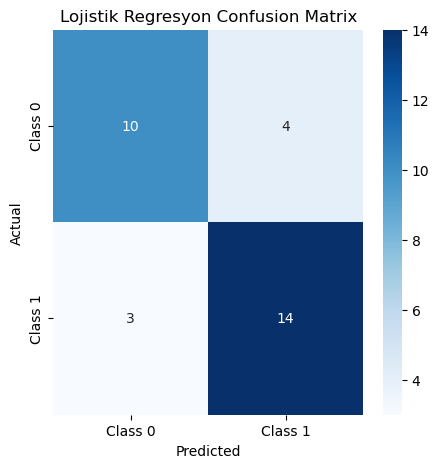

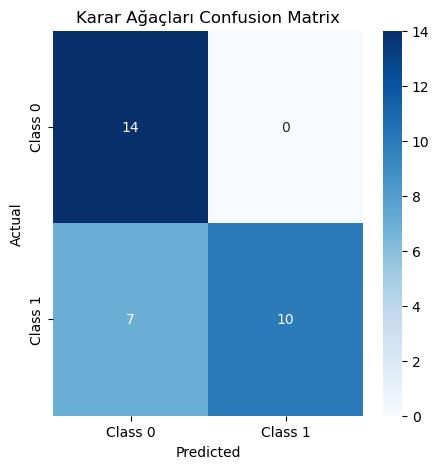

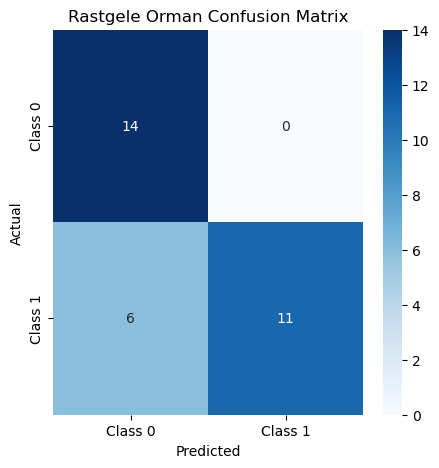

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Lojistik Regresyon Confusion Matrix
logreg_cm = confusion_matrix(y_test, logreg_test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Lojistik Regresyon Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Karar Ağaçları Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Karar Ağaçları Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Rastgele Orman Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Rastgele Orman Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [107]:
# Final model: En iyi modeli seçip tüm verilerle eğitmek
final_model = rf_best_model  # Örneğin, Rastgele Orman'ı en iyi model olarak seçelim
final_model.fit(X, y)


RandomForestClassifier(min_samples_leaf=5, random_state=42)

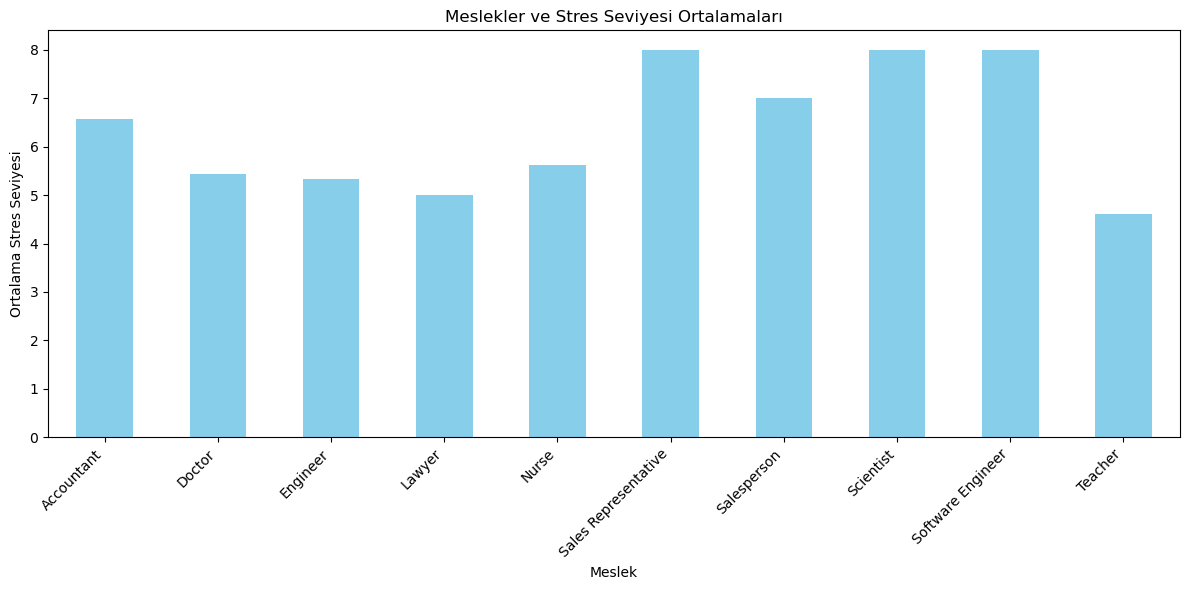

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Meslek ve stres seviyesi arasındaki ortalama değeri hesaplayalım
mean_stress_by_occupation = df_model.groupby('Occupation')['Stress Level'].mean()

# Bar plot ile meslek ve stres seviyesi ilişkisinin görselleştirilmesi
plt.figure(figsize=(12, 6))
mean_stress_by_occupation.plot(kind='bar', color='skyblue')

# Başlık ve etiketler
plt.title("Meslekler ve Stres Seviyesi Ortalamaları")
plt.xlabel("Meslek")
plt.ylabel("Ortalama Stres Seviyesi")
plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri döndürme
plt.tight_layout()

# Grafiği gösterme
plt.show()


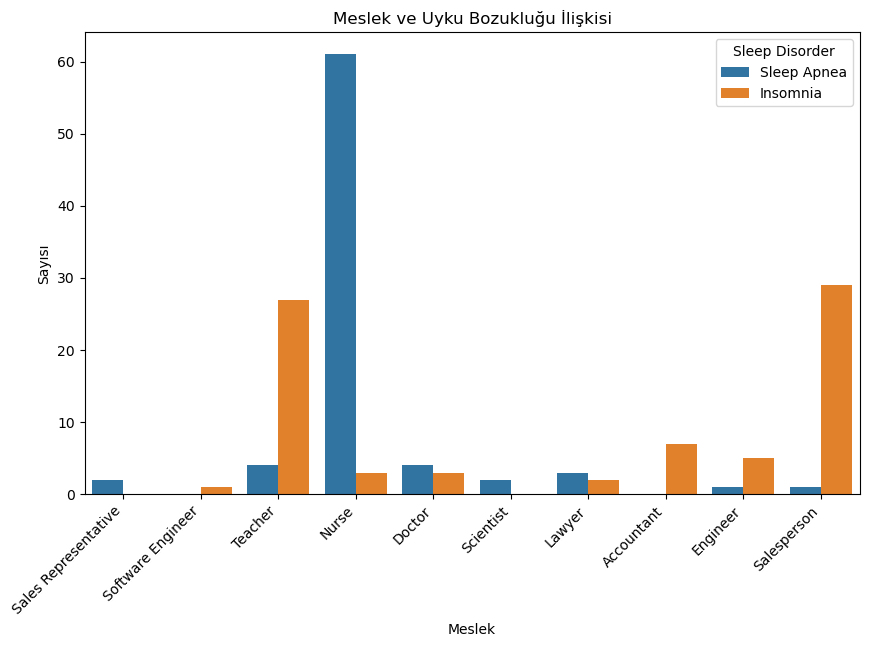

In [111]:
import seaborn as sns

# Meslek ve uyku bozukluğu ilişkisinin görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.countplot(data=df_model, x='Occupation', hue='Sleep Disorder')
plt.title("Meslek ve Uyku Bozukluğu İlişkisi")
plt.xlabel("Meslek")
plt.ylabel("Sayısı")
plt.xticks(rotation=45, ha='right')
plt.show()
